### Q1

### 回答:
若沒有手動shuffle，且我們的資料有驗證集的話

我們分離出來的驗證集裡面的資料，很可能會是過於集中於某一個答案的資料，樣本會不均勻

因此保險起見都會先手動shuffle

### Q2

### 回答:
我們可以分別對模型一二，進行overfitting的檢驗

batchsize皆為100 epochs皆為3

從下圖我們可以看到有手動shuffle對於模型的適配更佳

#### 模型一

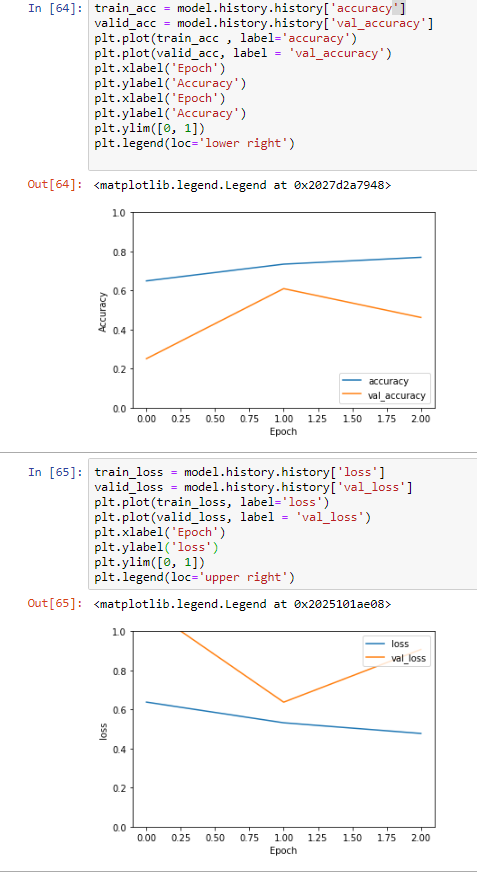

In [5]:
from IPython.display import Image
Image(filename= "m1.png")

#### 模型二

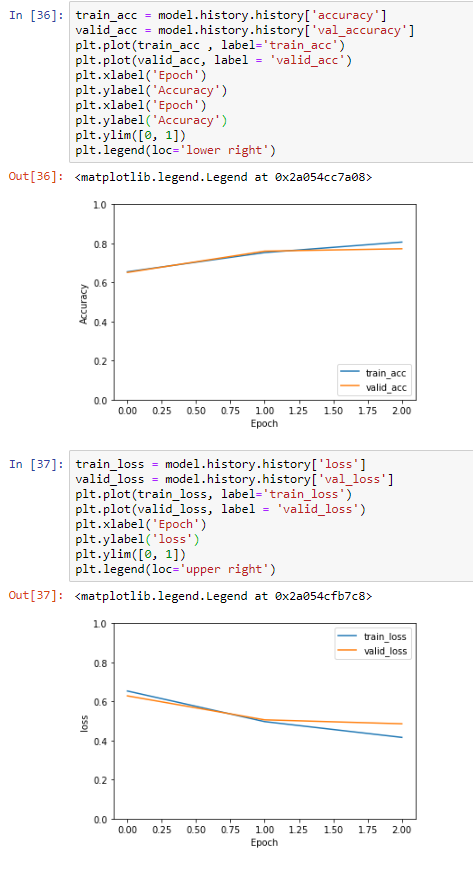

In [6]:
from IPython.display import Image
Image(filename= "m2.png")

### Q3

### 回答:
因為opencv的接口是使用BGR，而matplotlib.pyplot則是RGB

因此若不做色彩轉換，出來的圖片顏色會非常詭異

### 更改處:

1.利用cvtColor指令進行色彩轉換 

2.重塑資料時將 灰階 1通道 更改為 RGB 3通道

#### 訓練資料

In [ ]:
原本:
for j in image_list:
    img=cv2.imread(os.path.join(path,j),cv2.IMREAD_GRAYSCALE) #一樣使用灰階
    nimg=cv2.resize(img,dsize=(150,150)) #修改大小
    x_train.append(nimg) #加入array型態的圖片資料

修改後:
for j in image_list:
    img=cv2.imread(os.path.join(path,j))#不使用灰階
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#色彩轉換
    nimg=cv2.resize(img,dsize=(150,150)) #修改大小
    x_train.append(nimg) #加入array型態的圖片資料

In [ ]:
原本:
x_train=np.array(x_train).reshape(-1,150,150,1) #轉換資料

修改後
x_train=np.array(x_train).reshape(-1,150,150,3) #轉換資料

In [ ]:
原本:
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),padding='same',activation ='relu'))

修改後:
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),padding='same',activation ='relu'))

#### 測試資料

In [ ]:
原本:
for j in image_list:
    img=cv2.imread(os.path.join(path,j),cv2.IMREAD_GRAYSCALE) #一樣使用灰階
    nimg=cv2.resize(img,dsize=(150,150)) #修改大小
    x_train.append(nimg) #加入array型態的圖片資料

修改後:
for i in os.listdir(path):
    img=cv2.imread(os.path.join(path,i)) #不使用灰階，並將圖片轉為array態
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #轉換色彩輸出
    nimg=cv2.resize(img,dsize=(150,150)) #將圖片大小改為150x150
    x_test.append(nimg) #加入圖片資料進list

In [ ]:
原本:
x_test=np.array(x_test).reshape(-1,150,150,1) #重塑資料
修改後:
x_test=np.array(x_test).reshape(-1,150,150,3) #重塑資料

In [ ]:
原本:
def my_predict(n):
    if result[n]==int(0):
        a='貓'
    else:
        a='狗'
    print('我可愛的 CNN 預測是', a)
    X = x_test[n].reshape(150,150)
    plt.imshow(X)
    
修改後:
def my_predict(n):
    if result[n]==int(0):
        a='貓'
    else:
        a='狗'
    print('我可愛的 CNN 預測是', a)
    X = x_test[n].reshape(150,150,3)
    plt.imshow(X)    

#### 成果

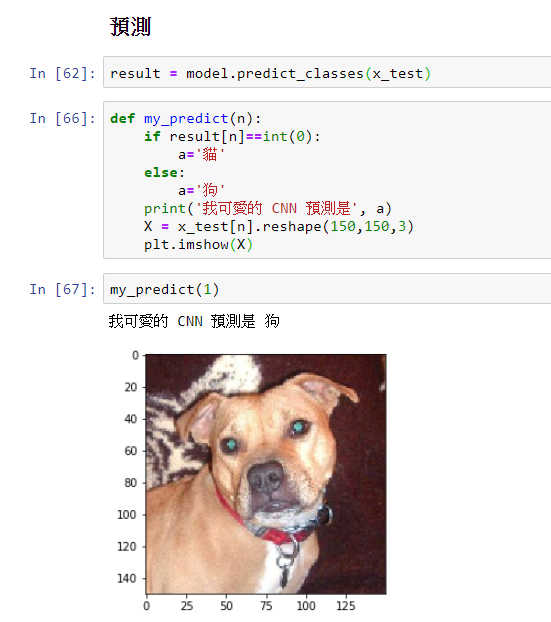

In [2]:
from IPython.display import Image
Image(filename= "example.png")